# Brain Tumor Identification using DL- Transfer Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import PIL

In [2]:
data_dir='.\\datasets\\brain_tumor_dataset'
import pathlib
data=pathlib.Path(data_dir)
data

WindowsPath('datasets/brain_tumor_dataset')

In [4]:
image=list(data.glob("**/*.jpg"))
images2=list(data.glob("**/*.jpeg"))
images3=image+images2

In [5]:
brain=cv2.imread(str(['roses'][0]))

In [6]:
labels={
    'no':0,
    'yes':1
}    

In [7]:
photo_dict={
    'no':list(data.glob('*/no/*')),
    'yes':list(data.glob('*/yes/*'))
}

In [8]:
image5=cv2.imread(str(photo_dict['yes'][0]))

In [9]:
X, y = [], []
for labels2, images in photo_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(labels[labels2])

In [10]:
X=np.array(X)
y=np.array(y)

In [11]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X,y,test_size=0.2)

In [12]:
from keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [13]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(include_top=False, weights='imagenet',input_shape=(180,180,3))

In [14]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0])

In [15]:
from tensorflow.keras import layers, models
x = layers.Flatten()(base_model.output) 
x = layers.Dense(256, activation='relu')(x)  
x = layers.Dropout(0.5)(x)  
output_layer = layers.Dense(1, activation='sigmoid')(x)
model = models.Model(inputs=base_model.input, outputs=output_layer)

In [89]:
y_train

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0])

In [16]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [17]:
model.fit(x_train,y_train,epochs=15)

Epoch 1/15
7/7 [==============================] - 108s 15s/step - loss: 34.5801 - accuracy: 0.5842
Epoch 2/15
7/7 [==============================] - 97s 14s/step - loss: 1.3246 - accuracy: 0.4653
Epoch 3/15
7/7 [==============================] - 101s 14s/step - loss: 0.6855 - accuracy: 0.6188
Epoch 4/15
7/7 [==============================] - 103s 14s/step - loss: 0.6768 - accuracy: 0.6139
Epoch 5/15
7/7 [==============================] - 96s 14s/step - loss: 0.6339 - accuracy: 0.6436
Epoch 6/15
7/7 [==============================] - 94s 13s/step - loss: 0.6312 - accuracy: 0.6634
Epoch 7/15
7/7 [==============================] - 93s 13s/step - loss: 0.6484 - accuracy: 0.6832
Epoch 8/15
7/7 [==============================] - 94s 13s/step - loss: 0.5886 - accuracy: 0.6881
Epoch 9/15
7/7 [==============================] - 92s 13s/step - loss: 0.6057 - accuracy: 0.6980
Epoch 10/15
7/7 [==============================] - 98s 14s/step - loss: 0.5844 - accuracy: 0.6881
Epoch 11/15
7/7 [========

In [18]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 7s 2s/step - loss: 0.4141 - accuracy: 0.8039


[0.4141351282596588, 0.8039215803146362]

(-0.5, 179.5, 179.5, -0.5)

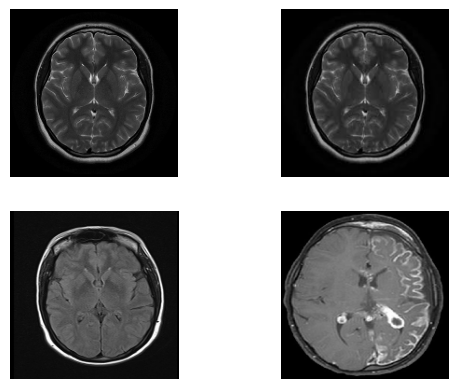

In [30]:
plt.subplot(221)
plt.imshow(x_test[0])
plt.axis('off')
plt.subplot(222)
plt.imshow(x_test[1])
plt.axis('off')
plt.subplot(223)
plt.imshow(x_test[2])
plt.axis('off')
plt.subplot(224)
plt.imshow(x_test[3])
plt.axis('off')